<img src="Fitbit-logo.jpeg"></img>

The dataset contains one year of human activity such as calories, steps, distance in meters, floors, minutes sitting, minutes of moderate activity, minutes of intense activity as well as the calories burned for the activities .

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os
sns.set_style("dark")
print('Libraries imported!')

Libraries imported!


In [2]:
activity = pd.read_csv('FitBit data.csv') 

### Pandas Profiling
Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code. Besides, if this is not enough to convince us to use this tool, it also generates interactive reports in web format that can be presented to any person, even if they don’t know programming.

In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable. It generates a report with all the information easily available.

Generates profile reports from a pandas `DataFrame`. The `pandas df.describe()` function is great but a little basic for serious exploratory data analysis. `pandas_profiling` extends the pandas DataFrame with `df.profile_report()` for quick data analysis.

For each column the following statistics - if relevant for the column type - are presented in an interactive HTML report:

<b>1. Type inference:</b> detect the types of columns in a dataframe.<br>
<b>2. Essentials: </b>type, unique values, missing values<br>
<b>3. Quantile statistics</b> like minimum value, Q1, median, Q3, maximum, range, interquartile range<br>
<b>4. Descriptive statistics </b>like mean, mode, standard deviation, sum, median absolute deviation, coefficient of variation, kurtosis, skewness<br>
<b>5. Most frequent values</b><br>
<b>6. Histogram</b><br>
<b>7. Correlations</b> highlighting of highly correlated variables, Spearman, Pearson and Kendall matrices<br>
<b>8. Missing values</b> matrix, count, heatmap and dendrogram of missing values<br>
<b>9. Text analysis</b> learn about categories (Uppercase, Space), scripts (Latin, Cyrillic) and blocks (ASCII) of text data.<br>
<b>10. File and Image analysis</b> extract file sizes, creation dates and dimensions and scan for truncated images or those containing EXIF information.

In [3]:
from pathlib import Path
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file

In [4]:
profile = ProfileReport(
        activity,
        title="FitBit",
        correlations={"cramers": {"calculate": False}},
        explorative=True,
    )
profile.to_file(Path("./fitbit_report.html"))

We can see the report generated from <a href="https://sahil17s.github.io/Pandas%20Profiling/">here</a>.

One of the strong points of the generated report are the warnings that appear at the beginning. It tells us the variables that contain NaN values, variables with many zeros, categorical variables with high cardinality, etc.<br>
The main disadvantage of pandas profiling is its use with large datasets. With the increase in the size of the data the time to generate the report also increases a lot.

As we have seen report generated from Pandas profiling, now we will analys data manually.

In [5]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886


In [6]:
activity.shape

(457, 15)

In [7]:
activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

In [8]:
activity['ActivityDate'].unique()

array(['3/25/2016', '3/26/2016', '3/27/2016', '3/28/2016', '3/29/2016',
       '3/30/2016', '3/31/2016', '4/1/2016', '4/2/2016', '4/3/2016',
       '4/4/2016', '4/5/2016', '4/6/2016', '4/7/2016', '4/8/2016',
       '4/9/2016', '4/10/2016', '4/11/2016', '4/12/2016', '3/12/2016',
       '3/13/2016', '3/14/2016', '3/15/2016', '3/16/2016', '3/17/2016',
       '3/18/2016', '3/19/2016', '3/20/2016', '3/21/2016', '3/22/2016',
       '3/23/2016', '3/24/2016'], dtype=object)

### Add Year, Month and Day to dataset

In [9]:
activity['year'] = pd.DatetimeIndex(activity['ActivityDate']).year
activity['month'] = pd.DatetimeIndex(activity['ActivityDate']).month
activity['date'] = pd.DatetimeIndex(activity['ActivityDate']).date

In [10]:
activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date
0,1503960366,3/25/2016,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,2016-03-25
1,1503960366,3/26/2016,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,2016-03-26
2,1503960366,3/27/2016,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,2016-03-27
3,1503960366,3/28/2016,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,2016-03-28
4,1503960366,3/29/2016,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,2016-03-29
5,1503960366,3/30/2016,10970,7.16,7.16,0.0,2.36,0.51,4.29,0.0,30,13,223,1174,1820,2016,3,2016-03-30
6,1503960366,3/31/2016,12256,7.86,7.86,0.0,2.29,0.49,5.04,0.0,33,12,239,820,1889,2016,3,2016-03-31
7,1503960366,4/1/2016,12262,7.87,7.87,0.0,3.32,0.83,3.64,0.0,47,21,200,866,1868,2016,4,2016-04-01
8,1503960366,4/2/2016,11248,7.25,7.25,0.0,3.00,0.45,3.74,0.0,40,11,244,636,1843,2016,4,2016-04-02
9,1503960366,4/3/2016,10016,6.37,6.37,0.0,0.91,1.28,4.18,0.0,15,30,314,655,1850,2016,4,2016-04-03


### Create a boxplot of calories burnt by grouping with Days of month

Text(0.5, 1.0, 'Box plot of Calories with Jitter by days of month')

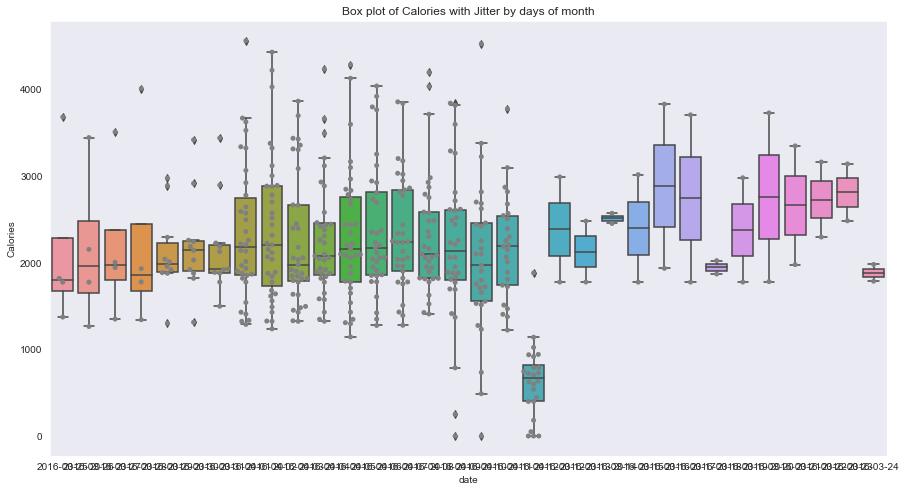

In [11]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='date', y='Calories', data=activity)
ax = sns.swarmplot(x='date', y='Calories', data=activity, color="grey")
ax.set_title('Box plot of Calories with Jitter by days of month')

In [12]:
activity.ActivityDate.dtype

dtype('O')

In [13]:
#Converting ActivityDate column to Datetime type
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate']) 

In [14]:
#Converting the day of the week to the name of the day
activity['day'] = activity['ActivityDate'].dt.dayofweek

In [15]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,day
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,2016-03-25,4
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,2016-03-26,5
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,2016-03-27,6
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,2016-03-28,0
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,2016-03-29,1


In [16]:
activity['weekday_name'] =activity['day'].map({
    0:"Sunday",
    1: "Monday",
    2: "Tuesday",
    3: "Wednesday",
    4: "Thursday",
    5: "Friday",
    6: "Saturday"
})

In [17]:
activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,year,month,date,day,weekday_name
0,1503960366,2016-03-25,11004,7.11,7.11,0.0,2.57,0.46,4.07,0.0,33,12,205,804,1819,2016,3,2016-03-25,4,Thursday
1,1503960366,2016-03-26,17609,11.55,11.55,0.0,6.92,0.73,3.91,0.0,89,17,274,588,2154,2016,3,2016-03-26,5,Friday
2,1503960366,2016-03-27,12736,8.53,8.53,0.0,4.66,0.16,3.71,0.0,56,5,268,605,1944,2016,3,2016-03-27,6,Saturday
3,1503960366,2016-03-28,13231,8.93,8.93,0.0,3.19,0.79,4.95,0.0,39,20,224,1080,1932,2016,3,2016-03-28,0,Sunday
4,1503960366,2016-03-29,12041,7.85,7.85,0.0,2.16,1.09,4.61,0.0,28,28,243,763,1886,2016,3,2016-03-29,1,Monday


### Calories per day of week

Text(0.5, 1.0, 'Barplot of calories by the day of the week')

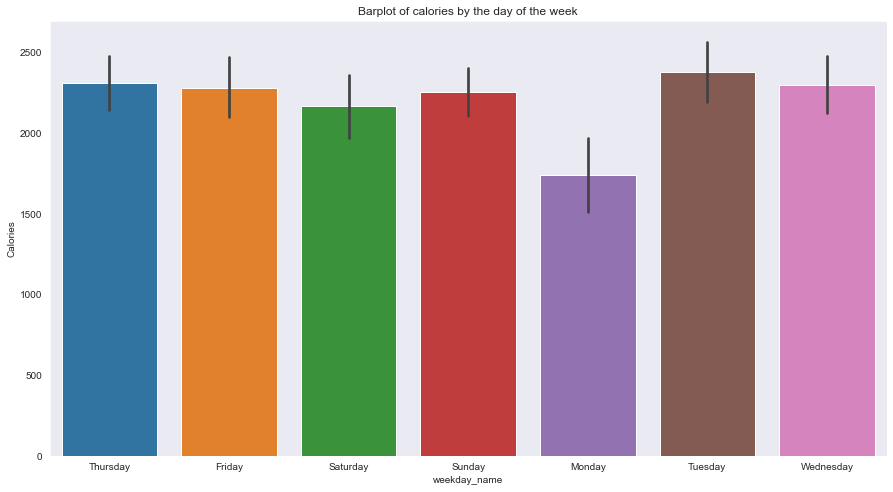

In [18]:
plt.figure(figsize=(15,8))
sns.barplot(x='weekday_name', y='Calories',data=activity)
plt.title('Barplot of calories by the day of the week')

### Calories v/s Sedentary Mintues

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

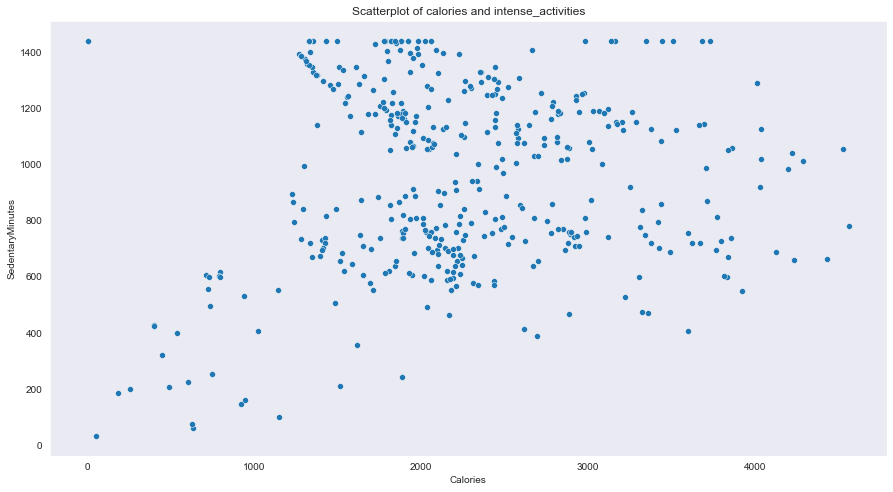

In [19]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='SedentaryMinutes', data=activity)
ax.set_title('Scatterplot of calories and intense_activities')

### Calories v/s Lighly Active Minutes

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

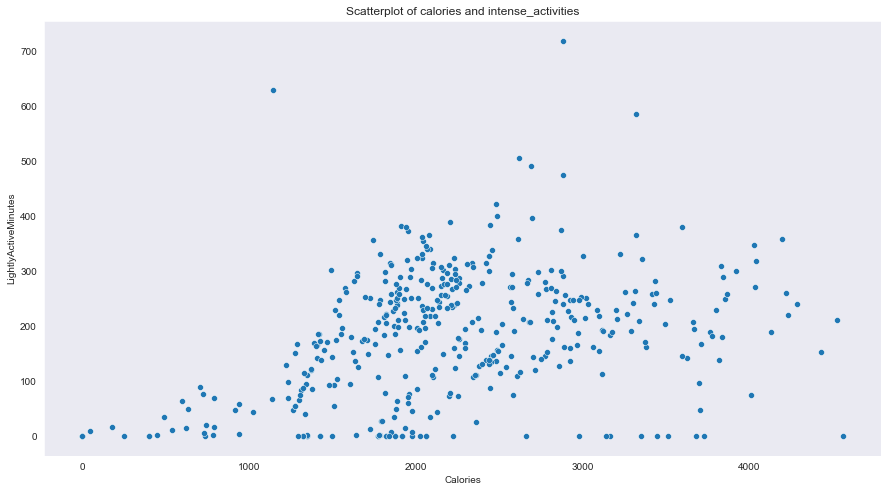

In [20]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='LightlyActiveMinutes', data=activity)
ax.set_title('Scatterplot of calories and intense_activities')

### Calories v/s Fairly Active Minutes

Text(0.5, 1.0, 'Scatterplot of calories vs Fairly Active Minutes')

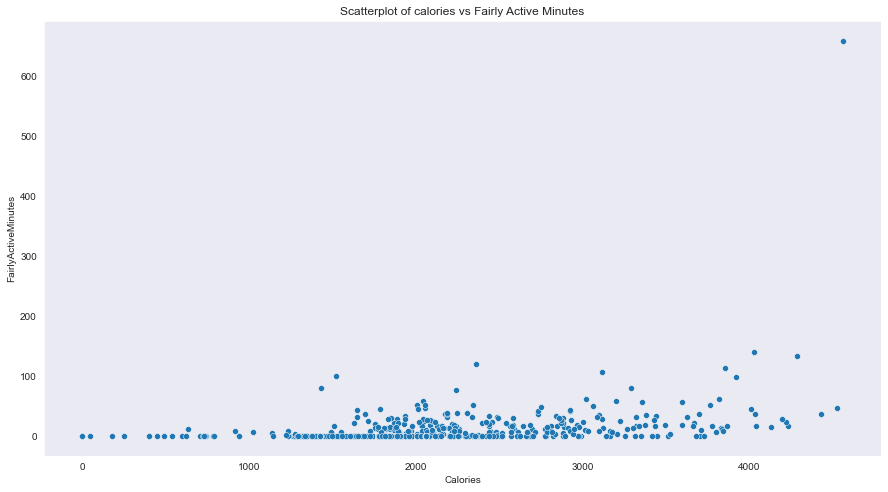

In [21]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='FairlyActiveMinutes', data=activity)
ax.set_title('Scatterplot of calories vs Fairly Active Minutes')

### Calories vs Very Active Minutes

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

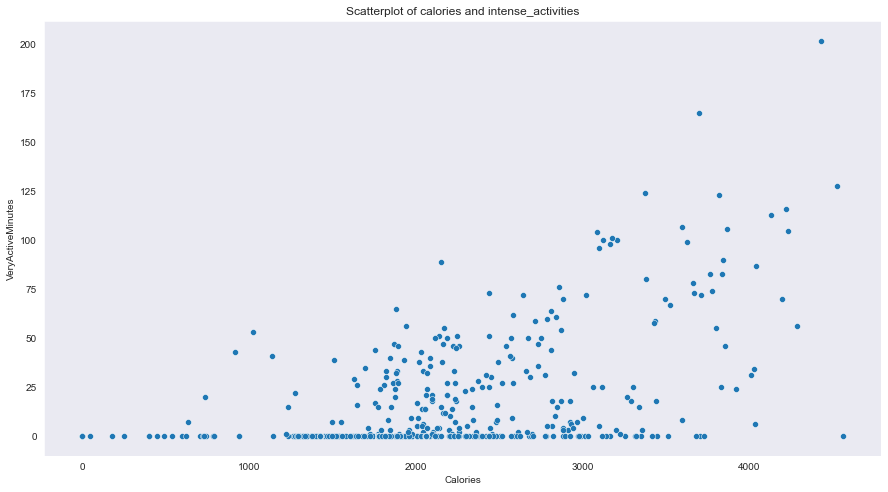

In [22]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='VeryActiveMinutes', data=activity)
ax.set_title('Scatterplot of calories and intense_activities')

### Timeseries plot based on activity minutes

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on activity minutes')

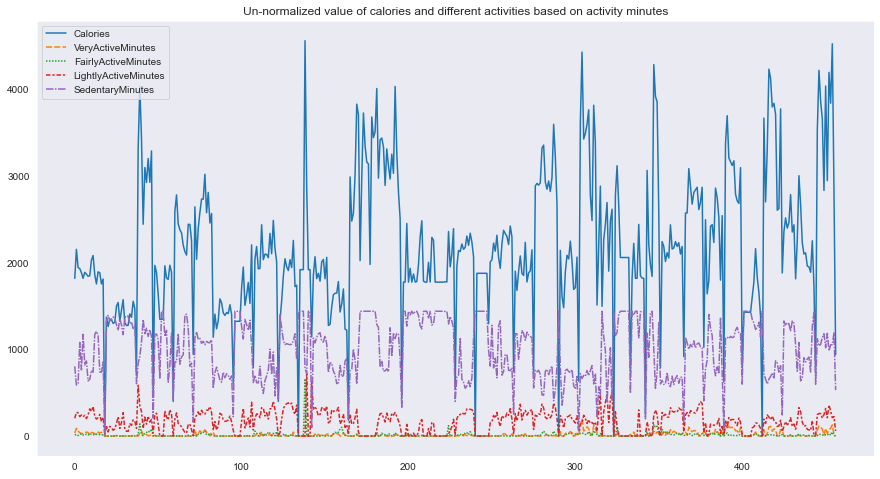

In [23]:
col_select = ['Calories','VeryActiveMinutes','FairlyActiveMinutes','LightlyActiveMinutes','SedentaryMinutes']
wide_df = activity[col_select]
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=wide_df)
ax.set_title('Un-normalized value of calories and different activities based on activity minutes')

### Calories v/s Total Distance

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

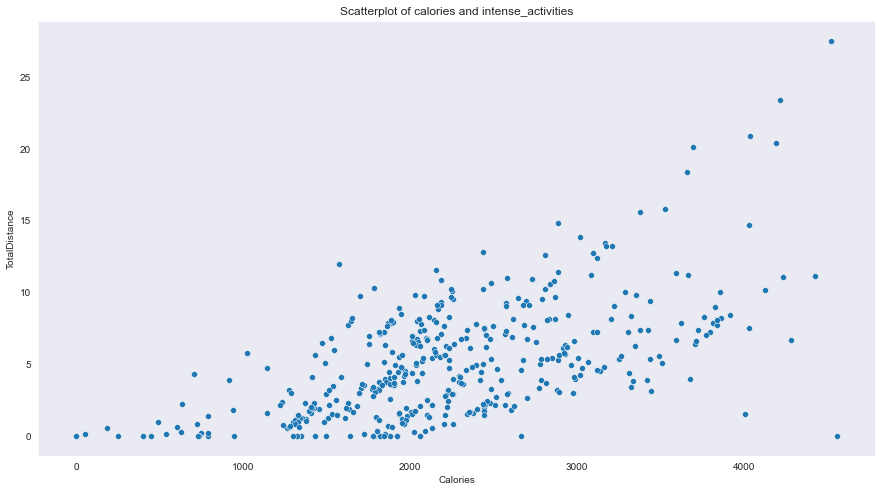

In [24]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='TotalDistance', data=activity)
ax.set_title('Scatterplot of calories and intense_activities')

### Calories v/s Logged Activities Distance

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

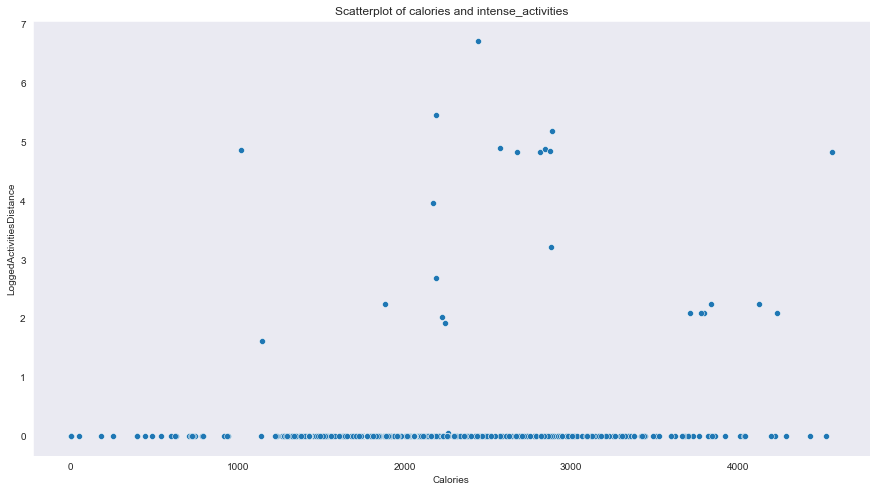

In [25]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='LoggedActivitiesDistance', data=activity)
ax.set_title('Scatterplot of calories and intense_activities')

### Calories v/s Very Active Distance

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

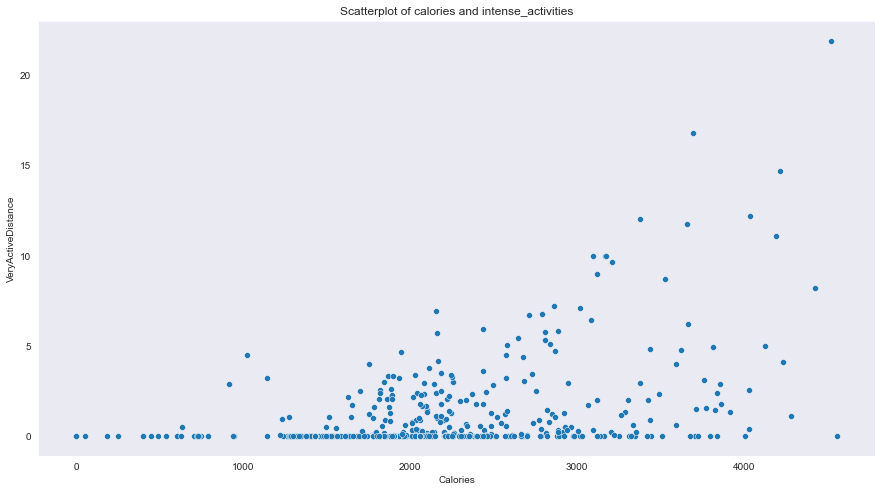

In [26]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='VeryActiveDistance', data=activity)
ax.set_title('Scatterplot of calories and intense_activities')

### Calories v/s Moderately Active Distance

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

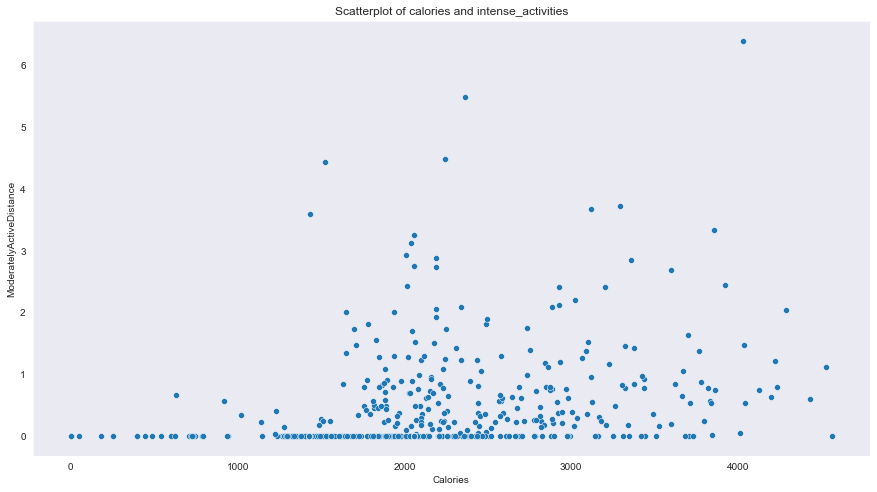

In [27]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='ModeratelyActiveDistance', data=activity)
ax.set_title('Scatterplot of calories and intense_activities')

### Calories v/s Light Active Distance

Text(0.5, 1.0, 'Scatterplot of calories and intense_activities')

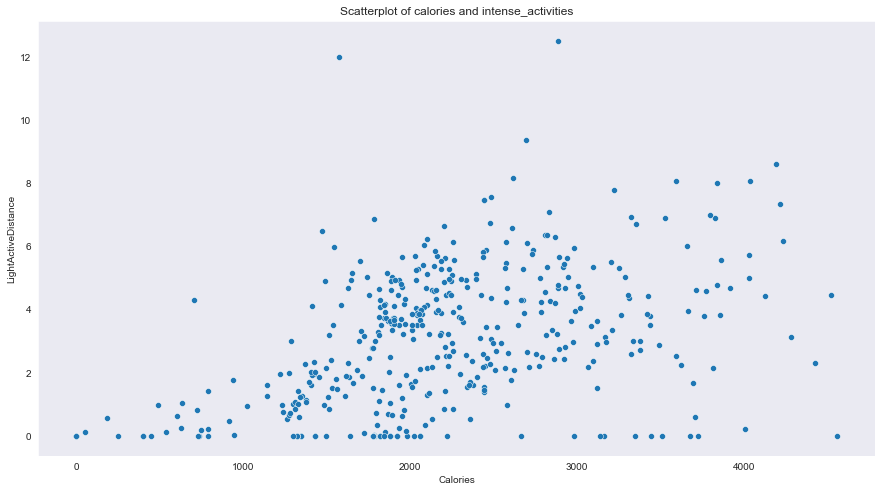

In [28]:
plt.figure(figsize=(15,8))
ax = sns.scatterplot(x='Calories', y='LightActiveDistance', data=activity)
ax.set_title('Scatterplot of calories and intense_activities')

### Timeseries plot based on activity distance

Text(0.5, 1.0, 'Un-normalized value of calories and different activities based on distance')

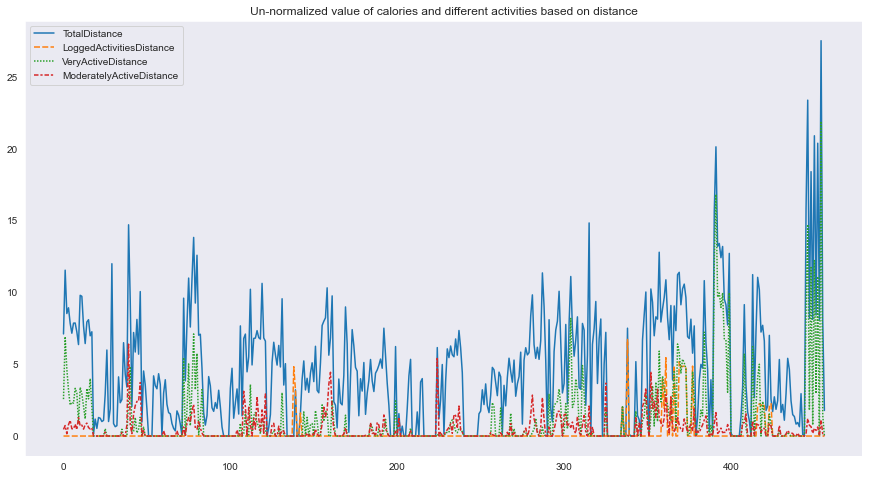

In [29]:
rol_select = ['TotalDistance','LoggedActivitiesDistance','VeryActiveDistance','ModeratelyActiveDistance']
wide_df1 = activity[rol_select]
plt.figure(figsize=(15,8))
ax = sns.lineplot(data=wide_df1)
ax.set_title('Un-normalized value of calories and different activities based on distance')